In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
import matplotlib.pyplot as plt

In [2]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 50
optimizer = Adam()
validation_split = 0.2
verbosity = 1

In [4]:
# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

170498071/170498071 [==============================] - 28s 0us/step


In [5]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [6]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [ ]:
print(input_train.shape)
print(input_test.shape)
print(input_shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(32, 32, 3)


**Models**

In [6]:
def model_1():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(no_classes, activation='softmax'))

  return model

In [ ]:
def model_2():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(no_classes, activation='softmax'))

  return model

In [7]:
def model_3():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(no_classes, activation='softmax'))

  return model

In [8]:
model = model_3()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0

In [9]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [11]:
# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/50
800/800 [==============================] - 71s 89ms/step - loss: 1.9115 - accuracy: 0.3248 - val_loss: 1.5232 - val_accuracy: 0.4283
Epoch 2/50
800/800 [==============================] - 70s 88ms/step - loss: 1.5203 - accuracy: 0.4435 - val_loss: 1.4351 - val_accuracy: 0.4795
Epoch 3/50
800/800 [==============================] - 71s 89ms/step - loss: 1.3987 - accuracy: 0.4947 - val_loss: 1.4073 - val_accuracy: 0.4845
Epoch 4/50
800/800 [==============================] - 69s 87ms/step - loss: 1.3129 - accuracy: 0.5314 - val_loss: 2.0226 - val_accuracy: 0.3811
Epoch 5/50
800/800 [==============================] - 69s 87ms/step - loss: 1.2587 - accuracy: 0.5557 - val_loss: 1.4552 - val_accuracy: 0.4983
Epoch 6/50
800/800 [==============================] - 71s 88ms/step - loss: 1.2105 - accuracy: 0.5727 - val_loss: 1.4970 - val_accuracy: 0.4749
Epoch 7/50
800/800 [==============================] - 69s 86ms/step - loss: 1.1705 - accuracy: 0.5869 - val_loss: 1.0759 - val_accuracy:

Test loss: 0.6905673146247864 / Test accuracy: 0.7597000002861023


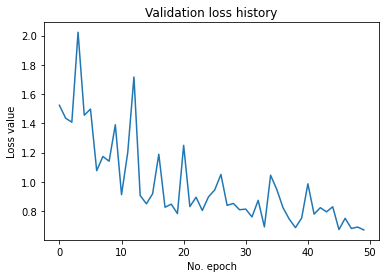

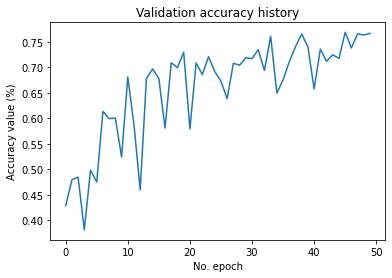

In [12]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()